## Python statistics essential training - 03_09_challenge

Standard imports

In [1]:
import numpy as np
import scipy.stats
import pandas as pd


In [2]:
import matplotlib
import matplotlib.pyplot as pp

import pandas.plotting

from IPython import display
from ipywidgets import interact, widgets

%matplotlib inline

In [3]:
import re
import mailbox
import csv

[Instructor] For your challenge, I would like you to plot the distribution by hour of my sent messages separately for each day and then overlay the plots for each day. I'm giving you some starter codes to load the data set and convert the dates

In [4]:
messages = pd.read_csv('mbox-cleaned.csv')

In [5]:
messages.columns

Index(['subject', 'from', 'to', 'date', 'dayofweek', 'timeofday', 'nyear'], dtype='object')

In [6]:
messages.head()

subject  \
0              Why control quickly exactly capital.   
1  Work evidence from really threat sign store see.   
2                  Lot where answer the law person.   
3                            Difference hotel yard.   
4              Long level mission energy candidate.   

                                                from  \
0  "Vallisneri, Michele (335S)" <Michele.Vallisne...   
1  Michele Vallisneri <Michele.Vallisneri@jpl.nas...   
2  "Vallisneri, Michele (335S)" <michele.vallisne...   
3  "Vallisneri, Michele (335S)" <Michele.Vallisne...   
4  "Vallisneri, Michele (335S)" <michele.vallisne...   

                                                  to  \
0          "Trevor Charles" <zrodriguez@hotmail.com>   
1  "Heather Hernandez" <patriciagarcia@garcia-car...   
2                Bryce Dudley <hailey63@frazier.com>   
3          Kathryn Mathis <josephrebecca@grimes.com>   
4                 "Angela Mendoza" <rkhan@yahoo.com>   

                        date dayofweek  timeofday        nyear  
0  2017-11-27 14:18:46-08:00    Monday  14.300000  2017.907860  
1  2018-03-26 18:38:16-07:00    Monday  18.633333  2018.234843  
2  2018-02-13 14:54:50-08:00   Tuesday  14.900000  2018.122165  
3  2018-01-26 11:40:04-08:00    Friday  11.666667  2018.072515  
4  2017-10-30 17:13:00-07:00    Monday  17.216667  2017.831533

In [7]:
messages.dtypes

subject       object
from          object
to            object
date          object
dayofweek     object
timeofday    float64
nyear        float64
dtype: object

In [8]:
#convert date to datetime objects
messages['date'] = messages['date'].apply(lambda s: pd.to_datetime(s).tz_convert('America/Los_Angeles'))

In [9]:
messages.dtypes

subject                                   object
from                                      object
to                                        object
date         datetime64[ns, America/Los_Angeles]
dayofweek                                 object
timeofday                                float64
nyear                                    float64
dtype: object

In [10]:
#convert day of week to categorical type
messages['dayofweek'] = pd.Categorical(messages['dayofweek'],
                                       ordered = True,
                                       categories = ["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"])

In [11]:
messages.dtypes

subject                                   object
from                                      object
to                                        object
date         datetime64[ns, America/Los_Angeles]
dayofweek                               category
timeofday                                float64
nyear                                    float64
dtype: object

Get the distribution by hour of my sent messages separately for each day

In [12]:
pd.to_datetime(messages['date'][10]).hour

15

In [13]:
messages['hourofday'] = messages['date'].apply(lambda s: pd.to_datetime(s).hour)

In [14]:
messages.dtypes

subject                                   object
from                                      object
to                                        object
date         datetime64[ns, America/Los_Angeles]
dayofweek                               category
timeofday                                float64
nyear                                    float64
hourofday                                  int64
dtype: object

In [15]:
messages.hourofday[:5]

0    14
1    18
2    14
3    11
4    17
Name: hourofday, dtype: int64

plot the distribution by hour of my sent messages separately for each day and then overlay the plots for each day.

In [16]:
#messages.head()
a = pd.DataFrame(messages.groupby(['dayofweek','hourofday']).size())
a

0
dayofweek hourofday   
Monday    0          0
          1          0
          2          1
          3          0
          4          0
...                 ..
Sunday    19         2
          20         2
          21         5
          22         4
          23         3

[168 rows x 1 columns]

In [17]:
days = messages.dayofweek.cat.categories
days

Index(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday',
       'Sunday'],
      dtype='object')

In [18]:
messages.dayofweek.cat

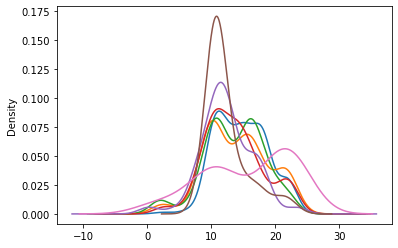

In [19]:
for day in days:
    messages[messages.dayofweek == day].timeofday.plot(kind='density')

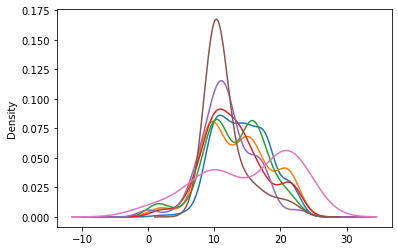

In [20]:
for day in days:
    messages[messages.dayofweek == day].hourofday.plot(kind='density')

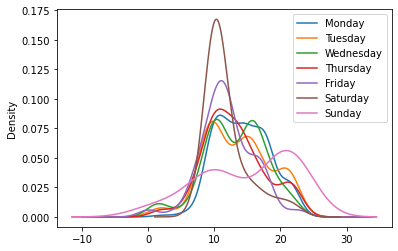

In [21]:
#we can add a legend to the plot with pp.legend
for day in days:
    messages[messages.dayofweek == day].hourofday.plot(kind='density')
    
pp.legend(days)

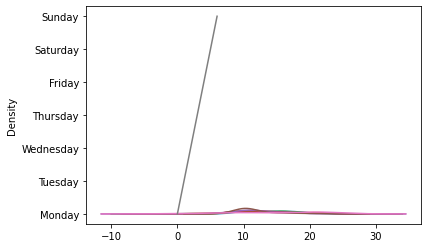

In [24]:
messages.groupby('dayofweek').hourofday.plot(kind='density')
pp.plot(days)

Disclaimer ... This example problem and solution not comprehensible, the solution also does not address the "by hour" portion

In [25]:
a.columns.name = 'emailcount'
a

emailcount           0
dayofweek hourofday   
Monday    0          0
          1          0
          2          1
          3          0
          4          0
...                 ..
Sunday    19         2
          20         2
          21         5
          22         4
          23         3

[168 rows x 1 columns]

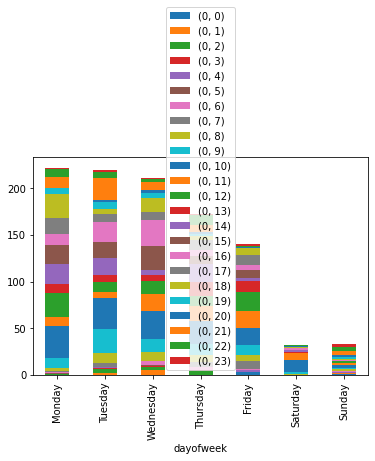

In [26]:
a.unstack().plot(kind='bar',stacked=True)
#a.unstack().plot(kind='bar')
pp.legend()

we can try converting hourofday to a categorical to have a nicer legend

In [27]:
messages['hourstr'] = pd.Categorical(messages['date'].dt.hour,ordered=True,
              categories=list(range(0,23))
              )

In [28]:
messages.dtypes

subject                                   object
from                                      object
to                                        object
date         datetime64[ns, America/Los_Angeles]
dayofweek                               category
timeofday                                float64
nyear                                    float64
hourofday                                  int64
hourstr                                 category
dtype: object

In [29]:
#messages.head()
a = pd.DataFrame(messages.groupby(['dayofweek','hourstr']).size())
a

0
dayofweek hourstr   
Monday    0        0
          1        0
          2        1
          3        0
          4        0
...               ..
Sunday    18       1
          19       2
          20       2
          21       5
          22       4

[161 rows x 1 columns]

In [30]:
#pp.tight_layout()
#for v in a.index.get_level_values(0):
#    print(a.ix[v])
    
#a.unstack(level=0).plot(kind='bar')
#pp.show()
m = a.unstack(level=0)
#m.loc[['Tuesday']]
m.columns.name = "hour"

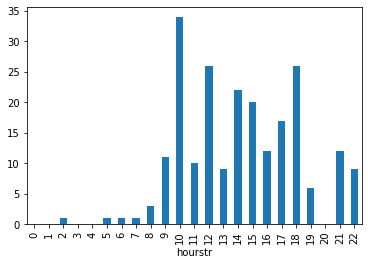

In [31]:
m[(0,'Monday')].plot(kind='bar')

In [32]:
for a in m:
    print(a)

(0, 'Monday')
(0, 'Tuesday')
(0, 'Wednesday')
(0, 'Thursday')
(0, 'Friday')
(0, 'Saturday')
(0, 'Sunday')


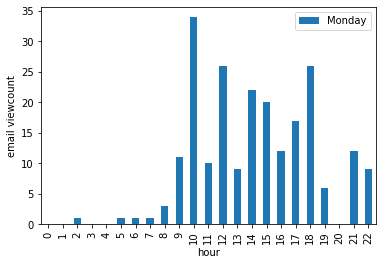

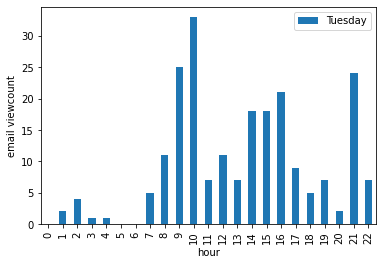

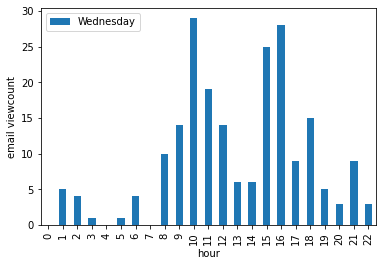

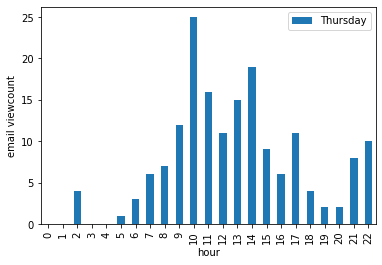

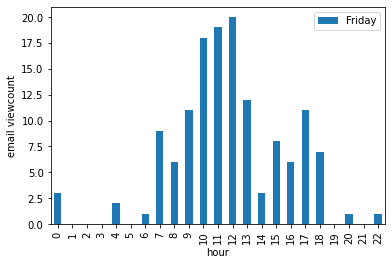

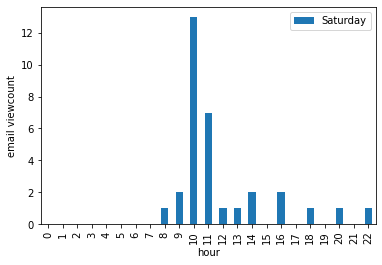

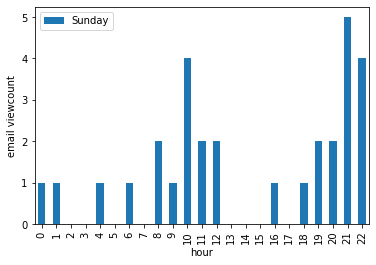

In [33]:
for a in m:
    pp.figure()
    m[a].plot(kind='bar')
    pp.legend(a[1:])
    pp.xlabel('hour')
    pp.ylabel('email viewcount')